In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import pytz
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = pd.read_csv('speedtest-log.csv')

In [3]:
# Remove empty/failed results
results = results[results['Server ID'] != 'Cannot retrieve speedtest configuration']
results = results[results['Server ID'] != 'Cannot retrieve speedtest server list']

# Change bit measurement speed results to megabit and round to 3 digits
results['Download'] = np.round(results['Download'] / 1000000, 3)
results['Upload'] = np.round(results['Upload'] / 1000000, 3)

tz = pytz.timezone('Australia/Melbourne')

# Returns DT strings
def timefix_str(tstring):
    dt = datetime.strptime(tstring[:-1],'%Y-%m-%dT%H:%M:%S.%f')
    local_dt = pytz.utc.localize(dt, is_dst=None).astimezone(tz)
    return local_dt.strftime('%Y-%m-%d %H:%M:%S')

# Returns DT & TZ objects
def timefix_dt(tstring):
    dt = datetime.strptime(tstring[:-1],'%Y-%m-%dT%H:%M:%S.%f')
    return pytz.utc.localize(dt, is_dst=None).astimezone(tz)

results['Timestamp'] = results['Timestamp'].apply(lambda x: timefix_dt(x))

# Plot all data points (Mbits)

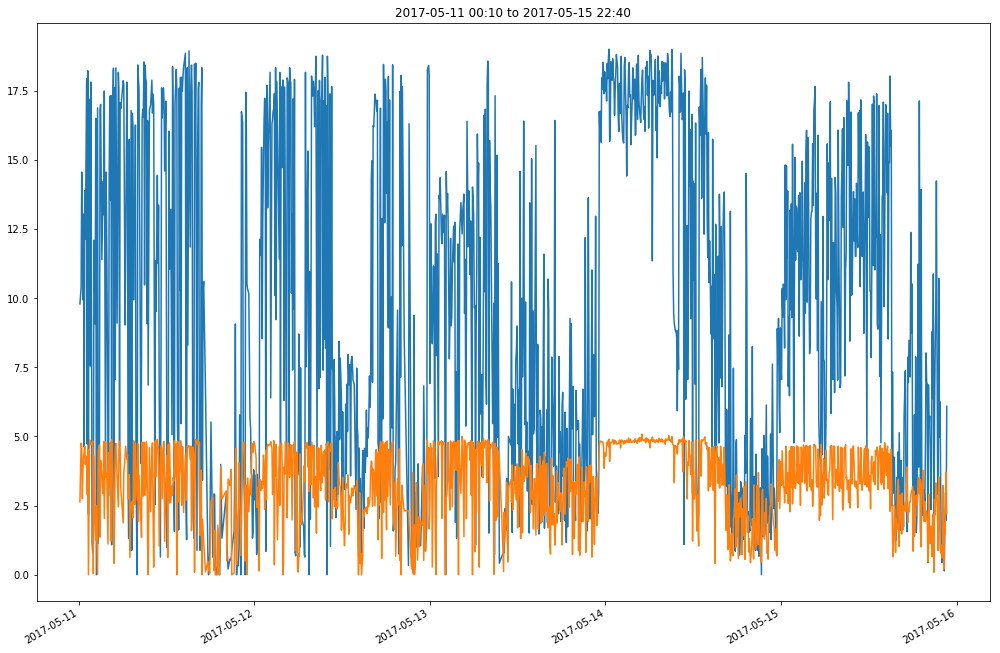

In [4]:
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

# Plot all results
plt.plot(results['Timestamp'], results['Download'])
plt.plot(results['Timestamp'], results['Upload'])
plt.gcf().autofmt_xdate()
plt.tight_layout()
name = ' '.join([results['Timestamp'].min().strftime('%Y-%m-%d %H:%M'),'to',results['Timestamp'].max().strftime('%Y-%m-%d %H:%M')])
plt.title(name)

# Mean performance per hour (Mbits)

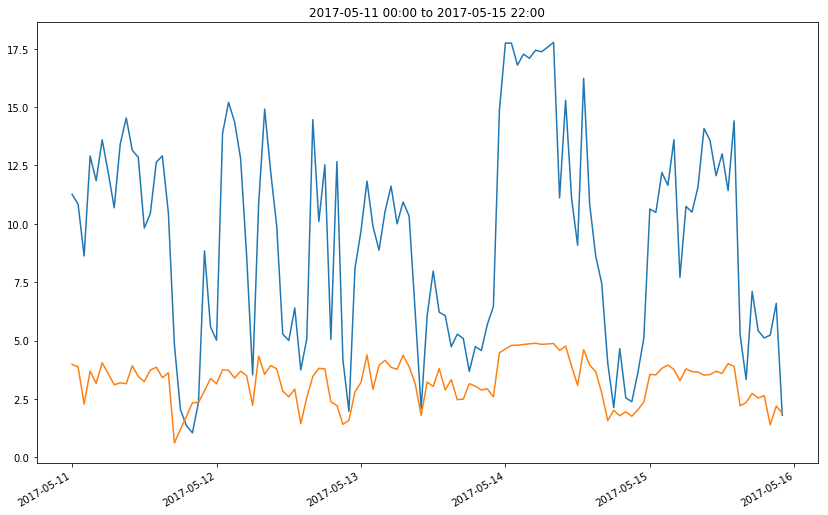

In [5]:
# Create seperate df for hourly plot
df = results[['Timestamp','Download','Upload']]
# Need to set the timestamps to the index so it can be resampled
df.index = df['Timestamp']
# Use resample('H') for hourly
# https://chrisalbon.com/python/pandas_group_data_by_time.html
hourly = df.resample('H').mean()
plt.plot(hourly.index, hourly['Download'])
plt.plot(hourly.index, hourly['Upload'])
#plt.plot_date(hourly.index,hourly['Download'],fmt='H')
#plt.plot_date(hourly.index,hourly['Upload'],fmt='H')
plt.gcf().autofmt_xdate()
name = ' '.join([hourly.index.min().strftime('%Y-%m-%d %H:%M'),'to',hourly.index.max().strftime('%Y-%m-%d %H:%M')])
plt.title(name)

In [6]:
hourly

,Download,Upload
Timestamp,,
2017-05-11 00:00:00+10:00,11.261222,3.979778
2017-05-11 01:00:00+10:00,10.841727,3.871909
2017-05-11 02:00:00+10:00,8.621111,2.279889
2017-05-11 03:00:00+10:00,12.903875,3.692125
2017-05-11 04:00:00+10:00,11.846500,3.167417
2017-05-11 05:00:00+10:00,13.596625,4.048500
2017-05-11 06:00:00+10:00,12.204000,3.583222
2017-05-11 07:00:00+10:00,10.686400,3.106600
2017-05-11 08:00:00+10:00,13.416500,3.192900
